### INFARTO DO MIOCÁRDIO CATASTRÓFICO ###

Segundo a organização mundial da saúde (OMS), cerca de 17.5 milhões de pessoas morrem em todo o mundo por conta de doenças cardiovasculares, como ataques cardiacos e derrames. Muitas dessas vítimas eram pessoas que não possuiam hábitos saudáveis, como o tabagismo, consumo de comidas ricas em sal e gordura e sedentarismo.

 **Fonte**:https://agenciabrasil.ebc.com.br/geral/noticia/2016-09/oms-175-milhoes-de-pessoas-morrem-todos-os-anos-de-doencas-cardiovasculares 

Mas, esses não são os únicos fatores que podem interferir no quadro de doença cardiovascular. Estamos interessados em entender como alguns fatores influenciam de forma direta, ou não, para o quadro de uma doença cardiovascular em específico, que é o ataque cardíaco e usaremos dados para fazer essa analise e tirar possíveis conclusões.

Em seguida, usaremos os algoritmos de machine learning para fazer predições com base nos fatores apresentados na base de dados, nesse caso, teremos um problema de classificação onde o atributo alvo terá caráter binário (target 0 ou 1). Os algoritmos de machine learning usados serão: 

- Knn 
- Tree decision 
- Random frorest 
- Svm 
- Regressão logística 
- Gradient Boosted Tree

E a partir disso, será feita a comparação entre esses algoritmos para identificar qual deles obteve uma melhor acurácia.

Então esse trabalho será dividido em 3 etapas e estas etapas estão dispostas em duas partes.:

1- Conhecendo os dados

2- Análise exploratória

3- Implementação dos algoritmos ML

4- Resultados

A primeira parte, que é a que está compondo este exato documento, conterá as etapas de conhecimento dos dados e análise exploratória. Em outro arquivo report estarão as duas últimas etapas, Implementação dos algoritmos e os resultados.


## 1- Conhecendo os dados ## 

A base de dados utilizada foi obtida em: https://www.kaggle.com/datasets/pritsheta/heart-attack?resource=download

Nessa base de dados temos um conjunto de informações sobre o coração de diversos paciêntes. Na celula abaixo segue o processo de carregamento e visualização dos dados.

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
import sys

sys.path.insert(0, '/content/gdrive/MyDrive')

In [21]:
from time import perf_counter
from pathlib import Path
from functools import partial

# 3rth part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Local
#import standard_pipeline 

plt.style.use("seaborn")


BASE_DIR = Path("../../datasets/heart_attack/")
RAW_FILE = BASE_DIR / Path("raw/heart_attack_data_set.csv")

#ds = load_and_process(RAW_FILE, pipeline)
# ds = pd.read_csv(file)

#ds.sample(5)
#ds.dtypes

dados = pd.read_csv("heart_attack_data_set.csv")

dados.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [2]:
dados.shape

(303, 14)

Nossa base de dados é dotada de 303 linhas  e 14 colunas, onde os atributos são informações relacionadas ao coração de paciêntes. Como podemos ver, temos informações sobre 303 paciêntes e essas informações são, por ordem de colunas:



1. Idade
2. Sexo
3. Tipo de dor no peito.
4. Pressão arterial em repouso.
5. colesterol sérico 
6. Açúcar no sangue em jejum. 
7. Resultados do eletrocardiograma em repouso. 
8. O maior número de bpm em exercício.
9. angina induzida por exercício.
10. infradesnivelamento do segmento ST.
11. Inclinação.
12. número de vasos principais.
13. AHD
14. Com doença ou sem doença.



Para esse conjunto de dados temos dados categóricos e numéricos, são 5 dados numéricos e 9 dados categóricos. As colunas categóricas são: 



* Sex
* Cp
* Fbs
* restecg
* exang
* slop
* ca
* thal
* target

E as colunas numéricas:

* Age
* Trestbps
* Chol
* thalach
* oldpeak



## 2- Analise exploratória ## 

Esta base de dados está em um excelente estado para realizar a análise, já que a mesma já se encontra processada, isso que dizer que os dados categóricos já foram convertidos em númericos, não temos valores faltantes (vide celula abaixo) e não há nennhum outro tipo de anomalia que possa inteferir na análise ou nas predições. A única coluna que aparentemente precisará de um encoder é a coluna "slope" (do tipo *One Hot*). Esta base poderia ser usada para dois tipos de predição: ou prever a categoria em "thal" que é um exame bastante confiável para a detecção de doenças cardíacas que pode indicar a severidade do problema, ou uma classificação binária entre doente ou não.

In [3]:
dados.isnull().any().any()

False

Vale a pena observar as característica estatística do nosso conjunto de dados, portanto:

In [4]:
dados.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Na celula acima podemos ver grandezas como média (mean), desvio padrão (std) valores mínimos e máximos e os percentis de cada um dos atributos presentes nos dados, vale a pena ressaltar que essas grandezas só fazem sentido quando estamos observando os dados numéricos. 

Um outro ponto que vale a pena se observar é como esses dados estão distribuídos, e para isso, contamos com os gráficos do tipo histograma:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2f8ee42d0>,
      dtype=object)

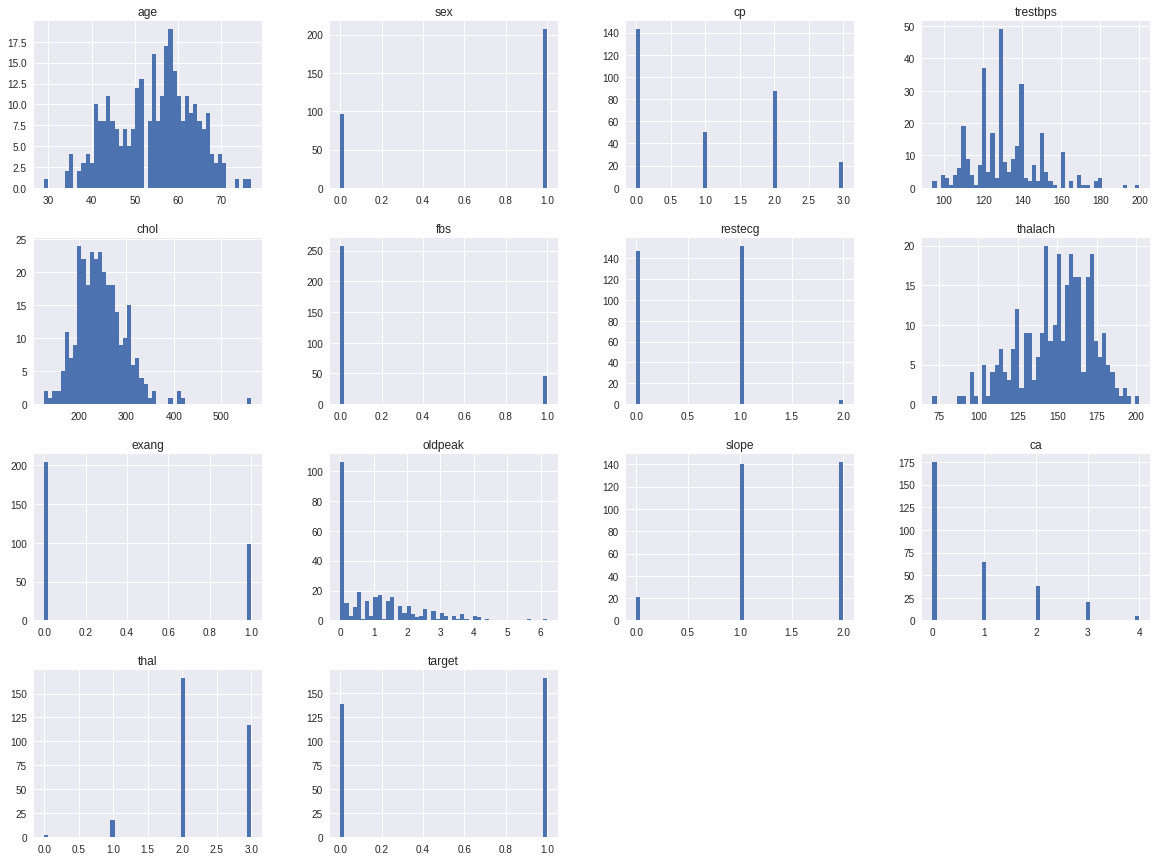

In [5]:
dados.hist(bins = 50, figsize = (20,15))

Podemos notar dessas distribuições que, para os dados numéricos, eles apresentam uma distribuição muito próxima da normal, com exceção da coluna oldpeak o que é bastante positivo do ponto de vista do treinamento dos modelos. Enquanto que para os dados categóricos, podemos ver qual a recorrência de determinados valores onde temos os picos.  

Agora veremos a correlação das colunas quantitativas em relação a coluna alvo (target) 

1 -> Com doença 

2 -> Sem doença

In [17]:
matrix_corr = dados.corr()

In [18]:
matrix_corr['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

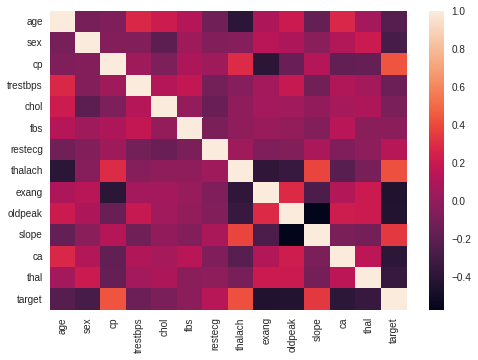

In [20]:
sns.heatmap(dados.astype({"target": int, "thal": int}).corr())

Temos que quanto maior a correlação, podemos dizer que maior é a "relação" de um atributo com o outro, dito isso, a coluna "thal" é anti-correlacionada com o alvo, o que se pode deduzir pela descrição do conjunto de dados.

"oldpeak" e "age" são anti-correlacionados. Enquanto "thalach" está muito correlacionado. 



Um outro tipo de histograma também pode ser gerado, e dele é possível obter informações interessantes.

In [24]:
labels = ["age", "chol", "oldpeak", "thalach"]

def plot_hist(l):
    dados.loc[dados.target == 1, l].hist(label="Heart disease", alpha=0.6, histtype="stepfilled", ec="k")
    dados.loc[dados.target == 0, l].hist(label="Healthy Heart", alpha=0.6, histtype="stepfilled", ec="k")
    plt.xlabel(l)
    plt.legend()



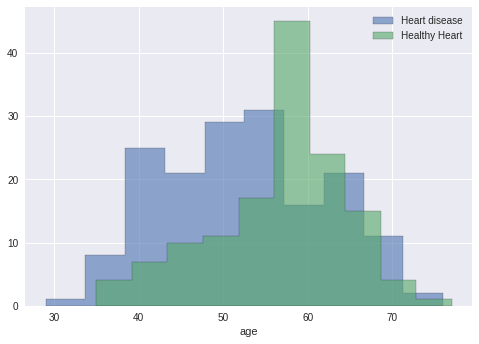

In [25]:
plot_hist("age")

Há um padrão interessante no histograma de idade. A classe saudável tem um pico na velhice, enquanto a classe doente tem um pico na idade mais jovem. Talvez haja um viés aqui... Uma suposição é que as pessoas com problemas cardíacos têm maior tendência a morrer mais jovens, portanto, não podem ser rastreadas.... Ou talvez a população mais velha tenda a fazer mais exames apesar de estar doente e, portanto, há um pico lá.

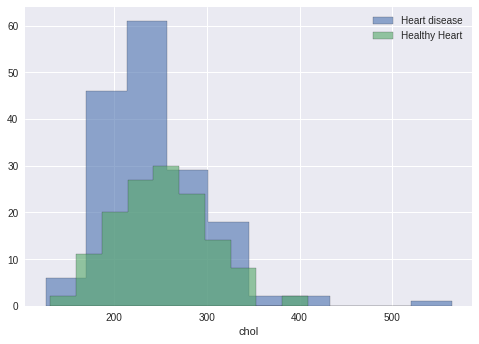

In [26]:
plot_hist("chol")

Existe um viés interessante aqui... O colesterol é um fator conhecido que está diretamente ligado a problemas cardiovasculares por razões fisiológicas (o excesso de colesterol está ligado à formação de depósitos de gordura nos vasos sanguíneos), porém há um pico de pessoas com colesterol baixo entre a amostra de doenças cardíacas ... Isso pode indicar que esta amostra fez uma dieta restritiva para ajudar seu corpo e, portanto, tem menos colesterol no sangue.

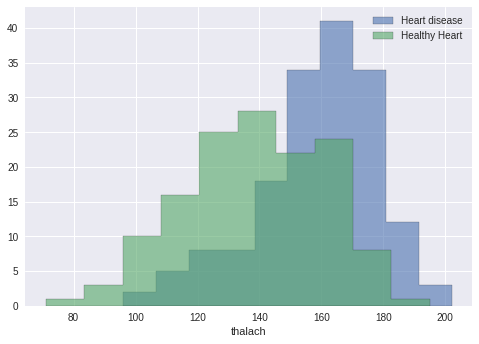

In [28]:
plot_hist("thalach")

Esse recurso é o que melhor separa as duas classes até agora. A partir desse histograma é possível supor que o coração das pessoas que possuem problemas precisa fazer um esforço maior durante os exercícios.

Adiante, seria interessante direcionar um olhar para como a classe categórica doente ou não, se relaciona com as outras classes categóricas presentes no conjunto de dados. Para isso, segue o código e os gráficos de barras gerados


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


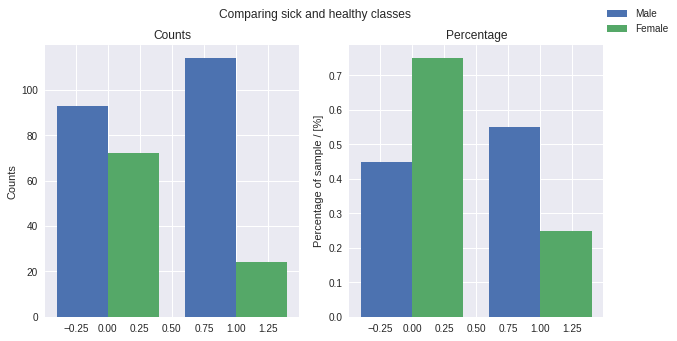

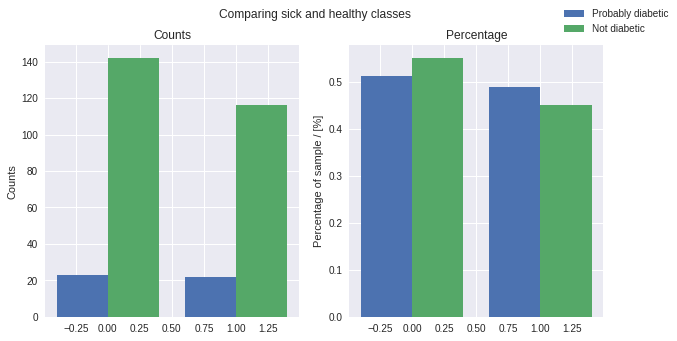

In [30]:
def compare_binary_classes(class_column, class_0, class_1):
    """helper function to help plotting the comparizon between binary classes"""
    
    class_1_size = (dados[class_column] == 1).sum()
    class_0_size = (dados[class_column] == 0).sum()

    sick_class_1 = ((dados.target == 1) & (dados[class_column] == 1)).sum()  # /class_1_size
    sick_class_0 = ((dados.target == 1) & (dados[class_column] == 0)).sum()  # /class_0_size
    helthy_class_1 = ((dados.target == 0) & (dados[class_column] == 1)).sum()  # /class_1_size
    helthy_class_0 = ((dados.target == 0) & (dados[class_column] == 0)).sum()  # /class_0_size

    # create data
    labels = ["sick", "healthy"]
    x = np.arange(len(labels))
    y1 = np.array([sick_class_1, helthy_class_1])
    y2 = np.array([sick_class_0, helthy_class_0])

    fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10, 5))

    width = 0.40

    ax1.bar(x - width/2, y1, width, label=class_1)
    ax1.bar(x + width/2, y2, width, label=class_0)

    ax2.bar(x - width/2, y1/class_1_size, width)
    ax2.bar(x + width/2, y2/class_0_size, width)

    ax1.set_xticks(x, labels)
    ax1.set(ylabel="Counts", title="Counts")

    ax2.set_xticks(x, labels)
    ax2.set(ylabel="Percentage of sample / [%]", title="Percentage")

    fig.suptitle("Comparing sick and healthy classes")
    fig.legend()
    

class_column = ["sex", "fbs"]
class_1 = ["Male", "Probably diabetic"]
class_0 = ["Female", "Not diabetic"]

for cc, c1, c0 in zip(class_column, class_1, class_0):
    compare_binary_classes(cc, c0, c1)


Sabemos que a idade é um dos fatores que influenciam no aparecimento de doenças cardíacas, com isso, dar certa atenção a este atributo é importante. Para tal, vamos usar o recurso dos gráficos de disperção e ver como esse atributo está posicionado em relação aos outros (numéricos) nessa base de dados.  

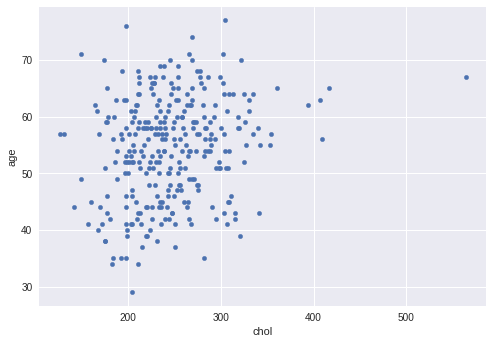

In [31]:
  dados.plot(kind = 'scatter', x = 'chol', y='age')

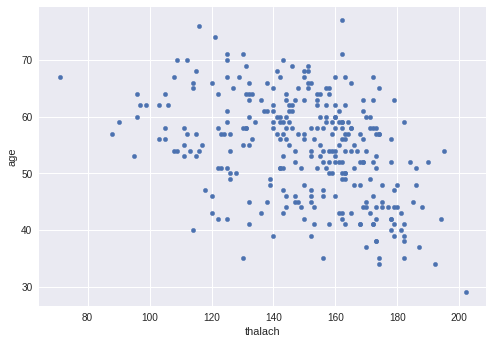

In [32]:
dados.plot(kind = 'scatter', x = 'thalach', y='age')

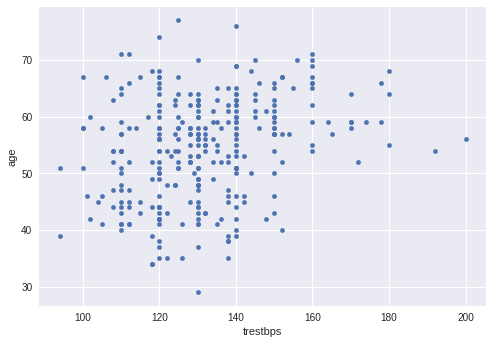

In [33]:
dados.plot(kind = 'scatter', x = 'trestbps', y='age')

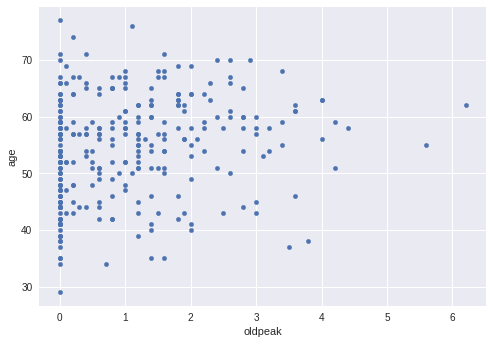

In [34]:
dados.plot(kind = 'scatter', x = 'oldpeak', y='age')

Devemos levar em consideração também que, para uma análise mais detalhada de todos esses gráficos apresentados até então, seria necessário um conhecimento mais aprofundado de cada um dos atributos presentes nessa base de dados. Contudo, o nosso papel também é de "mastigar" os dados para que seja possível uma análise mais simples e eficiênte em situações futuras, situações essas que poderiam contar com profissionais especializados nessa área, neste caso, médicos ou enfermeiros.

